# Примеры к лекции 14. Представление сигналов ортогональными рядами.


Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pywt # PyWavelets - Wavelet Transforms in Python

In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

## Пример: вейлет-анализ и синтез с функциями Хаара ('db1') в двумерном случае

In [4]:
wavelet = pywt.Wavelet('db1')
print(wavelet)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [5]:
original = pywt.data.camera()

In [6]:
original

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

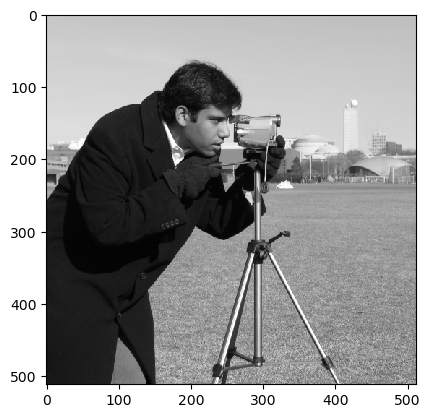

In [7]:
plt.figure()
plt.imshow(original, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [8]:
coeffs = pywt.wavedec2(original, 'db1')
coeffs

[array([[66079.09179688]]),
 (array([[11897.61914063]]),
  array([[-17088.53710938]]),
  array([[3464.42773437]])),
 (array([[ 1.30750977e+04,  5.06541797e+03],
         [-4.73798828e+03, -5.14062500e+00]]),
  array([[ 5224.87109375, -2723.29296875],
         [-9837.35546875, -1124.03125   ]]),
  array([[ 2434.93359375,  2459.24609375],
         [ 2443.30859375, -1253.875     ]])),
 (array([[ -496.9296875,  6809.84375  ,   -55.03125  ,  -588.53125  ],
         [ 5224.3046875,  2601.5234375,  4946.3046875,  3490.171875 ],
         [   99.5      , -5169.578125 , -1224.1484375,   452.1328125],
         [-1271.0390625,   379.109375 ,   142.4453125,   -32.0546875]]),
  array([[  113.0859375,  2180.625    ,  -461.4375   ,    93.984375 ],
         [ 6010.5703125, -2054.1484375, -3522.0859375,  -143.1875   ],
         [  -13.71875  , -3425.328125 , -2459.0546875,    47.4453125],
         [-1258.5859375, -1902.       ,  -748.0859375,   108.2265625]]),
  array([[  -77.1015625, -2020.734375 ,   5

In [9]:
len(coeffs)

10

In [10]:
coeffs = pywt.wavedec2(original, 'db1')
for level in [-1, -2]:
    coeffs[level] = tuple([np.zeros_like(v) for v in coeffs[level]])
new = pywt.waverec2(coeffs, 'db1')

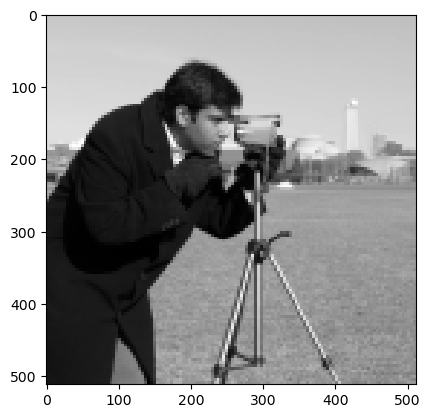

In [11]:
plt.figure()
plt.imshow(new, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [12]:
coeffs = pywt.wavedec2(original, 'db1')
for level in range(7):
    coeffs[level] = tuple([np.zeros_like(v) for v in coeffs[level]])
new = pywt.waverec2(coeffs, 'db1')

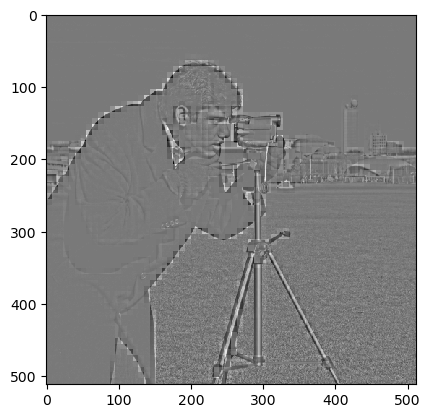

In [13]:
plt.figure()
plt.imshow(new, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

## Вывод базисных функций для примера. 

In [49]:
coeffs

[(array([0.]),),
 (array([[0.]]), array([[0.]]), array([[0.]])),
 (array([[0., 0.],
         [0., 0.]]),
  array([[0., 0.],
         [0., 0.]]),
  array([[0., 0.],
         [0., 0.]])),
 (array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]])),
 (array([[1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]),
  array([[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
        

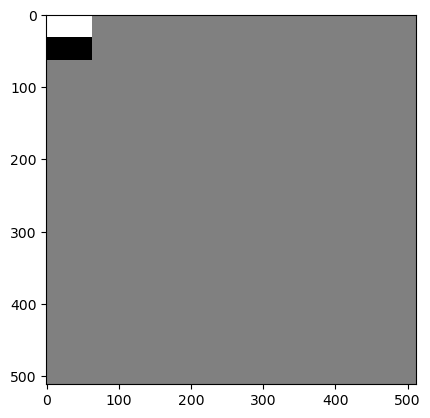

In [50]:
coeffs = pywt.wavedec2(original, 'db1')
coeffs
for level in range(len(coeffs)):
    coeffs[level] = tuple([np.zeros_like(v) for v in coeffs[level]])
    
    

# coeffs[0][0][0]=1
# coeffs[2][0][0, 1]=1
# coeffs[2][0][1, 1]=1
# coeffs[3][0][0, 0]=1
coeffs[4][0][0, 0]=1
new = pywt.waverec2(coeffs, 'db1')


plt.figure()
plt.imshow(new, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

##  См. также
* [1] PyWavelets https://pywavelets.readthedocs.io/
* [2] Лекция 5 курса ФРКТ/ФАКТ "Введение в вейвлет-анализ сигналов" https://nbviewer.org/url/kprf.mipt.ru/attachments/article/73/additional_seminar2_wavelets.ipynb . Видеозапись:  https://www.youtube.com/watch?v=N_WcA8R8zeU .


